In [3]:
import os
import numpy as np
import json
import nibabel as nib
import src.data.transforms as transforms
from nibabel.orientations import apply_orientation

In [4]:
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')
data_dir = 'data/raw/'
# Train data
train_patients = ['rtum13']
# Orientation
reorient = transforms.Orientation(('R', 'P', 'S'))

In [5]:
def _load_nifti_slices(sample_dir):
        """
        Load the NIfTI files for a given patient and create a segmentation mask.
        The segmentation mask is created by combining the masks for pancreas, 
        tumor, arteries, and veins.

        Parameters:
        -----------
        sample_dir : str
            Path to the patient directory.

        Returns:
        --------
        image : np.ndarray
            3D image volume.
        masks : np.ndarray
            Combined segmentation mask.
        """
        patient_id = os.path.basename(os.path.normpath(sample_dir))
        image_path = os.path.join(sample_dir, "SEQ", f"CTport-{patient_id}.nii")
        mask_paths = {
            "pancreas": os.path.join(sample_dir, "SEG", 
                                     f"Pancreas-{patient_id}.nii"),
            "tumor": os.path.join(sample_dir, "SEG", f"Tumor-{patient_id}.nii"),
            "arteries": os.path.join(sample_dir, "SEG", 
                                     f"Arterias-{patient_id}.nii"),
            "veins": os.path.join(sample_dir, "SEG", f"Venas-{patient_id}.nii"),
        }

        image = nib.load(image_path).get_fdata()
        num_slices = image.shape[2]
        masks = np.zeros_like(image)

        # Combine the segmentation masks
        for i, (_, path) in enumerate(mask_paths.items(), start=1):
            mask_data = nib.load(path).get_fdata()
            # Ensure the number of slices match the image
            mask_data = mask_data[:, :, :num_slices]
            # Binarize the mask
            mask_data = (mask_data > 0).astype(np.uint8)
            # Class label assignment: 1 for pancreas, 2 for tumor...
            masks[mask_data > 0] = i

        return image, masks

In [6]:
path = os.path.join(data_dir, 'rtum13')
image, masks = _load_nifti_slices(path)

In [7]:
print(image.shape)
print(masks.shape)

(512, 512, 67)
(512, 512, 67)


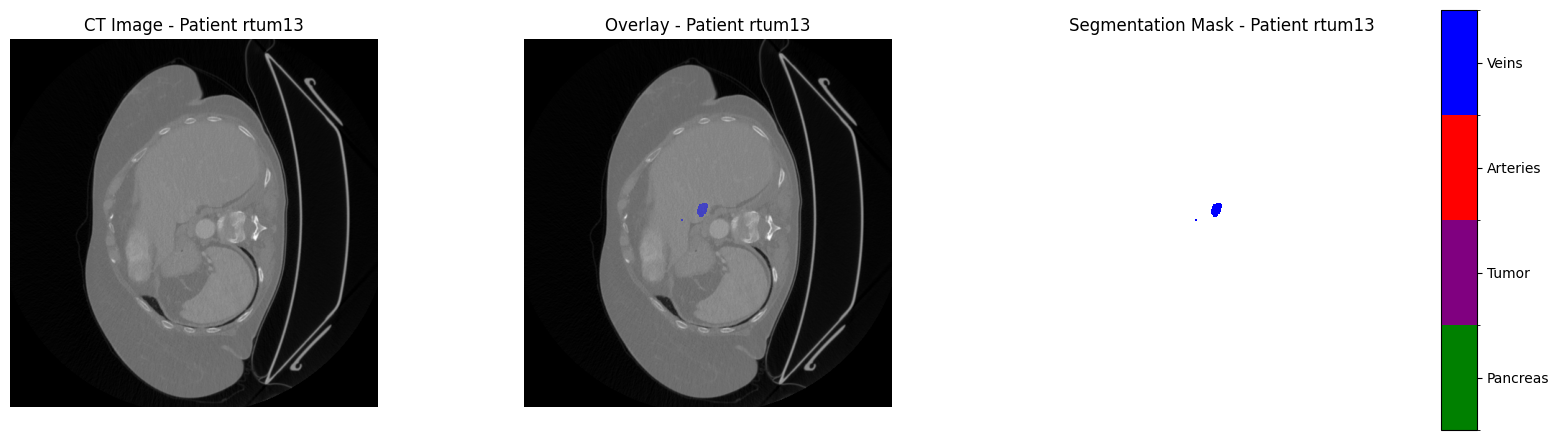

In [13]:
from src.utils.visualization import _plot_patient_slice
_plot_patient_slice(image[:, :, 65], masks[:, :, 65], 'rtum13')